# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [168]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
from sklearn.tree import plot_tree

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [169]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
# Lengkapi kode berikut

df = pd.read_csv("/content/data_clustering_inverse.csv")

In [170]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,PreviousTransactionDate,AgeGroup,TransactionAmountGroup,AgeGroup_Encoded,TransactionAmountGroup_Encoded,Cluster,Target
0,14.09,680,1,36,0,70.0,0,81.0,5112.21,105,Senior (60+),Transaksi Kecil,3,1,0,0
1,376.24,1178,1,15,0,68.0,0,141.0,13758.91,192,Senior (60+),Transaksi Besar,3,0,0,0
2,126.29,1262,1,23,2,19.0,3,56.0,1122.35,41,Muda (0-30),Transaksi Sedang,1,2,3,3
3,184.50,818,1,33,2,26.0,3,25.0,8569.06,163,Muda (0-30),Transaksi Sedang,1,2,0,0
4,13.45,1939,0,1,2,45.0,3,198.0,7429.40,16,Paruh Baya (46-60),Transaksi Kecil,2,1,1,1


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [171]:
y = df['Target']
X = df.drop(columns=[
    'Target', 'Cluster', 'AgeGroup_Encoded', 'TransactionAmountGroup_Encoded',
    'AgeGroup', 'TransactionDate', 'TransactionAmountGroup'
])

X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [172]:
dt_model_fair = DecisionTreeClassifier(random_state=42)
dt_model_fair.fit(X_train, y_train)

y_pred_fair = dt_model_fair.predict(X_test)

print("--- Evaluasi Model DecisionTree ---")
accuracy_fair = accuracy_score(y_test, y_pred_fair)
print(f"Akurasi Model: {accuracy_fair:.2%}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_fair))

--- Evaluasi Model DecisionTree ---
Akurasi Model: 28.03%

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.22      0.23      0.23       125
           1       0.33      0.37      0.35       126
           2       0.29      0.29      0.29       126
           3       0.27      0.23      0.25       126

    accuracy                           0.28       503
   macro avg       0.28      0.28      0.28       503
weighted avg       0.28      0.28      0.28       503



In [173]:
# Menyimpan Model
# import joblib
# joblib.dump(model, 'decision_tree_model.h5')
joblib.dump(y_pred_fair, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [174]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
#kita pakai random forest untuk compare nya
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [175]:
print("="*50)
print("--- Evaluasi Model: Decision Tree ---")

accuracy_dt = accuracy_score(y_test, y_pred_fair)
print(f"Akurasi: {accuracy_dt:.2%}")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_fair))

print("\n" + "="*50)
print("--- Evaluasi Model: Random Forest ---")

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi: {accuracy_rf:.2%}")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf))


--- Evaluasi Model: Decision Tree ---
Akurasi: 28.03%

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.22      0.23      0.23       125
           1       0.33      0.37      0.35       126
           2       0.29      0.29      0.29       126
           3       0.27      0.23      0.25       126

    accuracy                           0.28       503
   macro avg       0.28      0.28      0.28       503
weighted avg       0.28      0.28      0.28       503


--- Evaluasi Model: Random Forest ---
Akurasi: 27.63%

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.26      0.26      0.26       125
           1       0.28      0.32      0.30       126
           2       0.26      0.25      0.25       126
           3       0.32      0.28      0.30       126

    accuracy                           0.28       503
   macro avg       0.28      0.28      0.28       503
weighted avg       0.28      0.2

In [176]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
joblib.dump(rf_model, 'explore_RandomForest_classification.h5')

['explore_RandomForest_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [177]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [10, 20, 40]
}
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, None],
                         'min_samples_leaf': [10, 20, 40],
                         'min_samples_split': [5, 10, 20]},
             verbose=1)

--- Evaluasi Model Decision Tree Setelah di-Tuning ---
Akurasi Model: 0.2505 (25.05%)

Laporan Klasifikasi (Classification Report):
              precision    recall  f1-score   support

           0       0.25      0.28      0.26       125
           1       0.24      0.27      0.25       126
           2       0.25      0.24      0.24       126
           3       0.26      0.21      0.24       126

    accuracy                           0.25       503
   macro avg       0.25      0.25      0.25       503
weighted avg       0.25      0.25      0.25       503


Confusion Matrix:


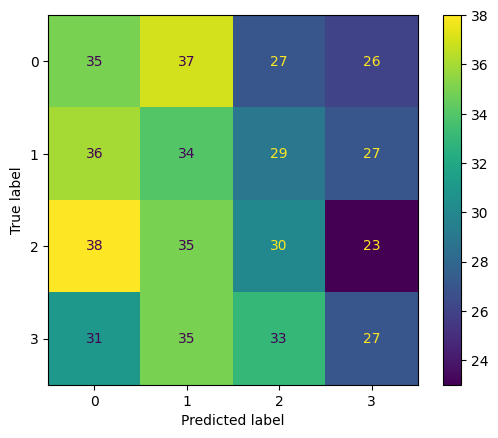

In [178]:
tuned_model = grid_search.best_estimator_

y_pred_tuned = tuned_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("--- Evaluasi Model Decision Tree Setelah di-Tuning ---")
print(f"Akurasi Model: {accuracy_tuned:.4f} ({accuracy_tuned:.2%})")

print("\nLaporan Klasifikasi (Classification Report):")
print(classification_report(y_test, y_pred_tuned))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [179]:
# Menyimpan Model hasil tuning
# import joblib
joblib.dump(tuned_model, 'tuning_classification.h5')

['tuning_classification.h5']

End of Code